In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from visualization import *
from core.file import NuMLFile
from IPython.display import clear_output
import plotly.graph_objects as go

In [3]:
fname = "/data/uboone/uboone_numu_slice_seq.h5"

In [4]:
"""Process all events in a file into graphs"""
f = NuMLFile(fname)
f.add_group("hit_table")
f.add_group("particle_table", ["g4_id", "parent_id", "type", "momentum", "start_process", "end_process"])
f.add_group("edep_table")
f.add_group("spacepoint_table")
f.read_data([0], [1000], use_seq=True, profile=False)
evt_list = f.build_evt(0, 1000)

In [5]:
# Process single key
# planes = single_plane_graph_vis(evt_list[0])
# plot_event(handle_planes(planes), print_out=True, write=False)

In [6]:
print(evt_list[2]['particle_table'])

     g4_id  parent_id  type  momentum        start_process  \
0        1          0    13  3.432707           b'primary'   
1        2          0  2112  0.332469           b'primary'   
2        3          0  2212  0.188507           b'primary'   
3        6          2    22  0.004488  b'neutronInelastic'   
4        7          2    22  0.003056  b'neutronInelastic'   
..     ...        ...   ...       ...                  ...   
610   1740       1718    11  0.003409             b'compt'   
611   1742       1718    11  0.001368             b'compt'   
612   1751       1716    11  0.000219             b'compt'   
613   1783       1711    11  0.000125              b'phot'   
614   1784       1740    11  0.001122             b'eIoni'   

              end_process  
0    b'FastScintillation'  
1     b'neutronInelastic'  
2    b'FastScintillation'  
3                 b'phot'  
4                 b'phot'  
..                    ...  
610  b'FastScintillation'  
611  b'FastScintillation'  
612

In [7]:
current_event = evt_list[2]
# print(current_event)
planes = single_plane_graph_vis(current_event)
particle = current_event['particle_table']
hier = extract_hierarchy(planes, particle)
print(hier) # 3 different tables, why?

func:'panoptic_label' took: 0.9264 sec
[       type  momentum  hit_count  \
0       NaN       NaN          0   
1      13.0  3.432707       1021   
3    2212.0  0.188507          3   
277    11.0  0.024399         13   
270    11.0  0.036330          6   
262    11.0  0.010358          2   
243    11.0  0.019433          8   
239    11.0  0.005545          1   
227    11.0  0.002919          1   
223    11.0  0.021396          6   
224    11.0  0.004042          2   
201    11.0  0.167281         22   
140    11.0  0.006308          2   
134    11.0  0.007066          5   
127    11.0  0.006778          2   
105    11.0  0.008207          4   
67     11.0  0.010771          1   
62     11.0  0.003424          2   
58     11.0  0.013134          2   
59     11.0  0.007499          4   
46     11.0  0.019435          6   
49     11.0  0.010125          4   
13     11.0  0.003394          1   
209    11.0  0.006765          2   
64     11.0  0.002709          1   
575    11.0  0.010066   

In [81]:
# Starting code for finding the particle hierarchy, assuming the above code works

# for each particle (given by g4_id), we have a list of their neighbors/children
# given in the form of hierarchy.iloc[g4_id]['neighbors']

# iterate through each particle and its children and create a big list of all the directed edges?
# seems inefficient...?

import networkx as nx
import matplotlib.pyplot as plt
# import pydot
# from networkx.drawing.nx_pydot import graphviz_layout
def vis_hierarchy(hier_df):
    ''' Visualize the tree hierarchy of a particle event '''
    # make a list of all the edges
    edges = []
    for particle in hier_df.index.values:
        if hier_df.iloc[particle]['neighbors'] == []: 
            break
        else:
            for neighbor in hier_df.iloc[particle]['neighbors']:
                edges.append((particle, neighbor))
    
    # turn this list into a networkx graph and visualize
    G = nx.DiGraph()
    G.add_edges_from(edges)
    
    plt.figure()
    # pos = nx.kamada_kawai_layout(G)
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    plt.show()

/tmp/ipykernel_26280/1121509928.py:18: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



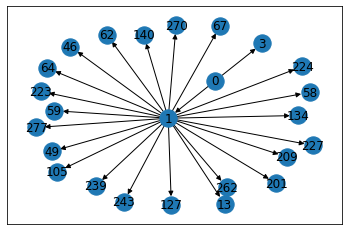

In [82]:
# Test function
current_event = evt_list[2]
test=hier[0]
vis_hierarchy(test)

/tmp/ipykernel_26280/1822286734.py:9: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



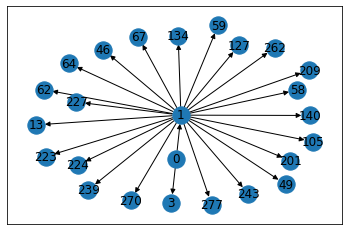

In [83]:
# 12/3 improve visualization

current_event = evt_list[2]
hier_df=hier[0]

# start of function
edges = []
for particle in hier_df.index.values:
    if hier_df.iloc[particle]['neighbors'] == []: 
        break
    else:
        for neighbor in hier_df.iloc[particle]['neighbors']:
            edges.append((particle, neighbor))

# turn this list into a networkx graph and visualize
G = nx.DiGraph()
G.add_edges_from(edges)

# plt.figure()
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
# plt.show()


In [84]:
print(len(G.edges()))
print(len(G.nodes()))
print(len(pos))

print((G.edges()))
print((G.nodes()))

24
25
25
[(0, 1), (0, 3), (1, 277), (1, 270), (1, 262), (1, 243), (1, 239), (1, 227), (1, 223), (1, 224), (1, 201), (1, 140), (1, 134), (1, 127), (1, 105), (1, 67), (1, 62), (1, 58), (1, 59), (1, 46), (1, 49), (1, 13), (1, 209), (1, 64)]
[0, 1, 3, 277, 270, 262, 243, 239, 227, 223, 224, 201, 140, 134, 127, 105, 67, 62, 58, 59, 46, 49, 13, 209, 64]


In [85]:
print(pos)

{0: array([-0.02981338, -0.42786427]), 1: array([0.00275057, 0.03918629]), 3: array([-0.06326078, -0.89536109]), 277: array([ 0.21658032, -0.91728392]), 270: array([-0.34576031, -0.86916236]), 262: array([0.65155394, 0.75666199]), 243: array([ 0.47019358, -0.79843406]), 239: array([-0.63933517, -0.75608395]), 227: array([-0.72241832,  0.17977811]), 223: array([-0.93270695, -0.40172075]), 224: array([-0.71333878, -0.49317683]), 201: array([ 0.76134392, -0.44652125]), 140: array([0.89689612, 0.03594683]), 134: array([-0.01654141,  0.8854463 ]), 127: array([0.40443589, 0.78248378]), 105: array([ 0.91775132, -0.24293188]), 67: array([-0.29241067,  0.87231874]), 62: array([-0.94756101,  0.31128512]), 58: array([0.81035736, 0.30636776]), 59: array([0.26152107, 0.99713634]), 46: array([-0.53529627,  0.73703524]), 49: array([ 0.72840638, -0.69931444]), 13: array([-1.        , -0.06463715]), 209: array([0.89074169, 0.51837387]), 64: array([-0.7740891 ,  0.59047158])}


In [86]:
# different node layouts found here: https://networkx.org/documentation/stable/reference/drawing.html
# following code adapted from https://plotly.com/python/network-graphs/ and https://towardsdatascience.com/tutorial-network-visualization-basics-with-networkx-and-plotly-and-a-little-nlp-57c9bbb55bb9

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [87]:
node_x = []
node_y = []
for node in pos:
    node_x.append(pos[node][0])
    node_y.append(pos[node][1])
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Number of Children',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [88]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('g4_id: ' + str(node) + '\n # of children: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

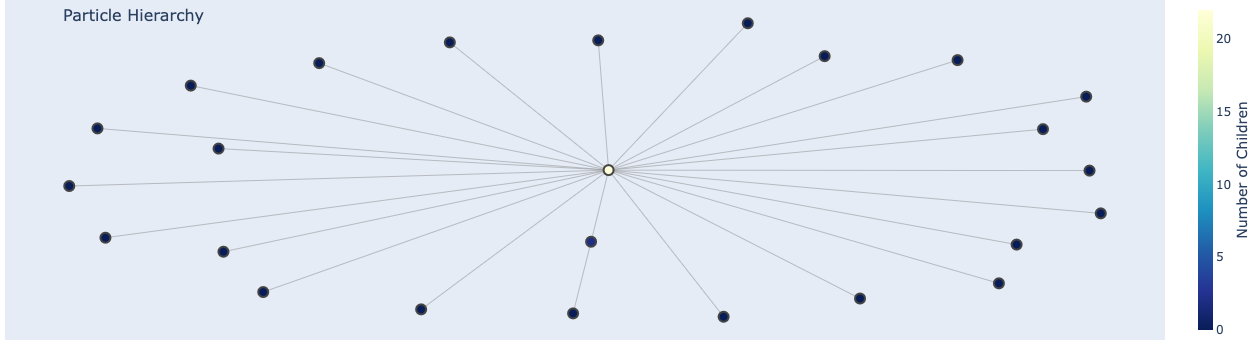

In [89]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Particle Hierarchy',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=0),
                # annotations=[ dict(
                #     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                #     showarrow=False,
                #     xref="paper", yref="paper",
                #     x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


In [32]:
# Below is old code for figuring out original (non-interactive) vis function

In [51]:
table1 = hier[0]
table1.index.values.tolist()
# vis_hierarchy(table_1)

[0, 1, 5, 4, 108, 95]

/tmp/ipykernel_6779/3386597217.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if table1.iloc[particle]['neighbors'] == []:


[(0, 1), (0, 5), (0, 4), (1, 108), (1, 95)]
DiGraph with 6 nodes and 5 edges


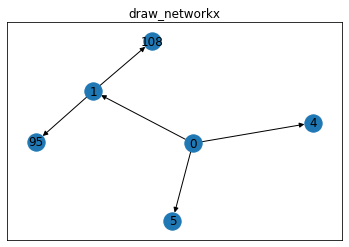

In [73]:
particles = table1.index.values #.tolist()
# table1.iloc[5]['neighbors']

edges = []
for particle in particles:
#     print(table1.iloc[particle]['neighbors'])
    if table1.iloc[particle]['neighbors'] == []: 
        break
    else:
#         print(table1.iloc[particle]['neighbors'])
        for neighbor in table1.iloc[particle]['neighbors']:
            edges.append((particle, neighbor))

print(edges)

G = nx.DiGraph() # or G = nx.DiGraph()
G.add_edges_from(edges)
print(G)

plt.title("draw_networkx")
nx.draw_networkx(G)

plt.show()

In [72]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
nx.nx_agraph.write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=False, arrows=False)
# plt.savefig('nx_test.png')

ImportError: requires pygraphviz http://pygraphviz.github.io/